## 完全手写一个简易ResNet

In [1]:
from tensorflow.keras.layers import *
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model, Sequential
import tensorflow as tf

## 定义Res模块

In [2]:
def res_block(x, filter_num_list, kernel_size_list):
    filter1, filter2, filter3 = filter_num_list
    kersiz1, kersiz2, kersiz3 = kernel_size_list
    # 连续的三层卷积
    conv_1 = Conv2D(filters=filter1, kernel_size=kersiz1)(x)
    conv_2 = Conv2D(filters=filter2, kernel_size=kersiz2, padding='same')(conv_1)
    conv_3 = Conv2D(filters=filter3, kernel_size=kersiz3, padding='same')(conv_2)
    # 一层短接层
    short_cut = Conv2D(filters=filter3, kernel_size=kersiz3)(x)
    # 一层融合层
    add_layer = Add()([short_cut, conv_3])
    # 一层池化层
    maxpool = MaxPooling2D()(add_layer)
    return maxpool

## 模型主体

In [3]:
input_layer = Input(shape=(224, 224, 3))

# 两个Dense模块
dense_1 = res_block(input_layer, [32, 64, 128], [3, 3, 3])
dense_2 = res_block(dense_1, [128, 128, 256], [3,3,3])

# 一路短接
short_cut = Conv2D(filters=256, kernel_size=9, strides=4)(input_layer)
add_layer = Add()([dense_2, short_cut])

maxpool = MaxPooling2D()(add_layer)

In [4]:
model = Model(inputs=input_layer, outputs=maxpool)

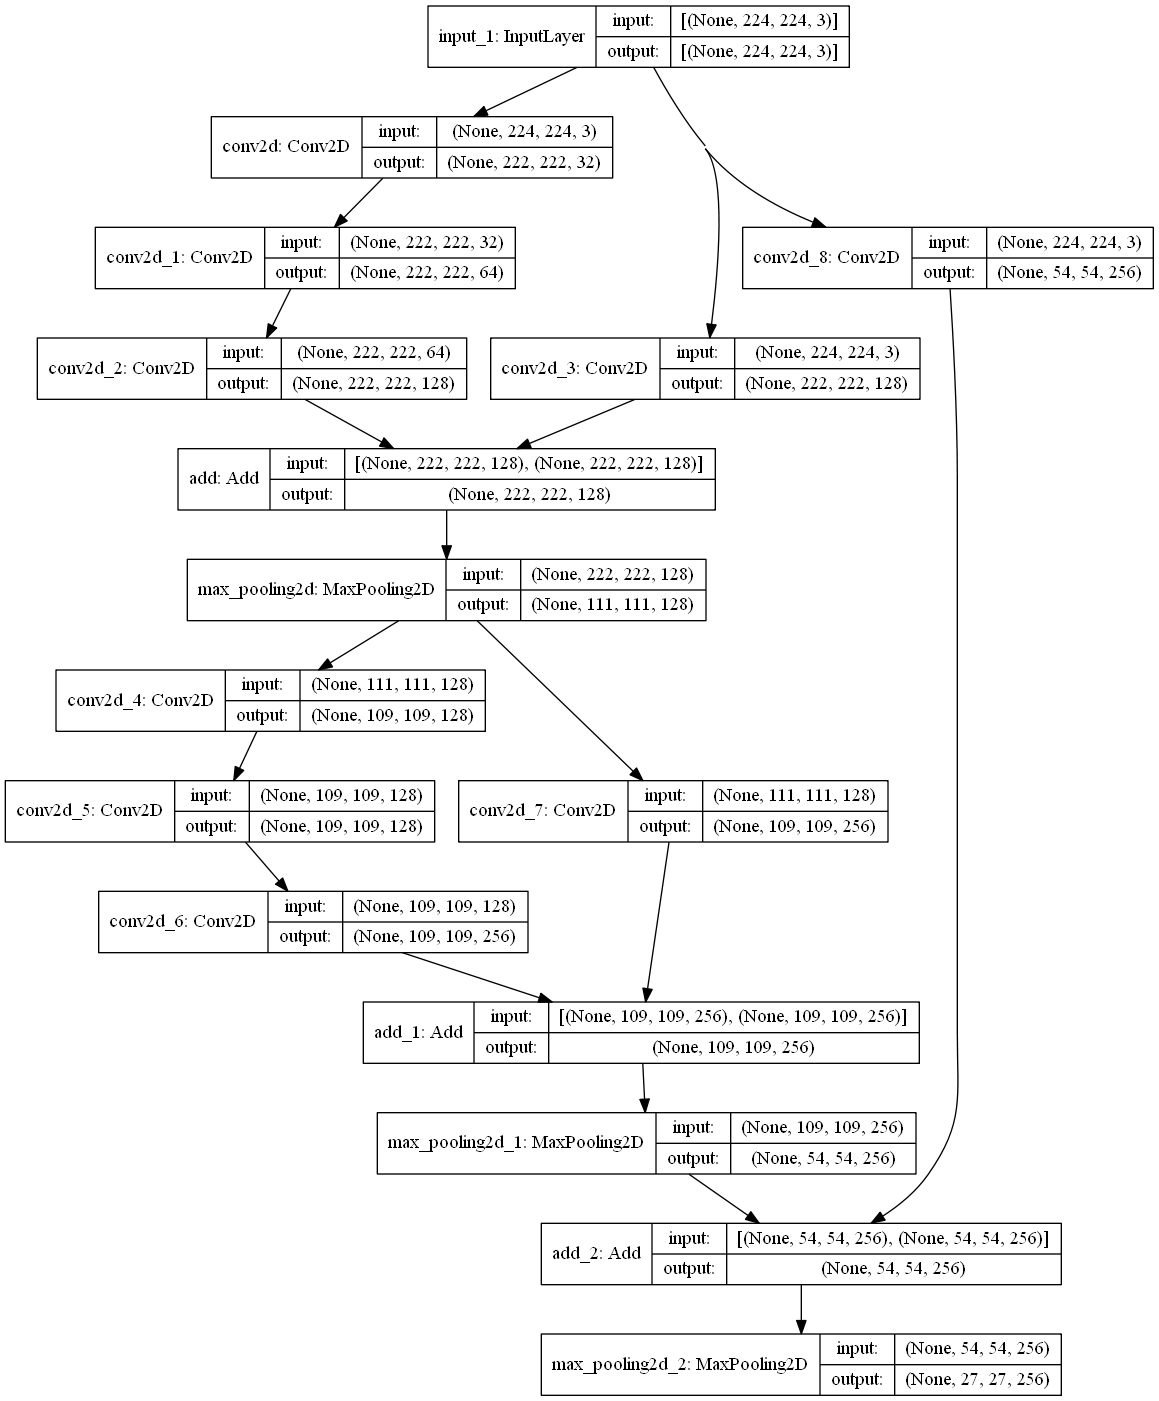

In [5]:
plot_model(model, show_shapes=True)